## <font color='blue'>Teste Prático Engenheiro de dados Jr.</font>

### <font color='blue'>Questão 1.</font>

In [1]:
# importando a biblioteca Pandas
import pandas as pd

In [2]:
# carregando o conjunto de dados para o data frame
df_sales = pd.read_excel("sales_data.xlsx", engine='openpyxl')

In [3]:
# Visualizando as primeiras linhas do conjunto de dados
df_sales.head(5)

,order_id,product_name,quantity,unit_price,cliente_id,order_date
0,1,Produto A,3,25,74,2024-03-01
1,2,Produto B,2,30,36,2024-03-02
2,3,Produto C,1,20,12,2024-03-03
3,4,Produto A,4,25,92,2024-03-04
4,5,Produto D,2,40,55,2024-03-05


In [4]:
# Verificando se existem valores nulos
df_sales.isna().sum()

order_id        0
product_name    0
quantity        0
unit_price      0
cliente_id      0
order_date      0
dtype: int64

In [5]:
# Verificando o tipo dos dados de cada campo
df_sales.dtypes

order_id                 int64
product_name            object
quantity                 int64
unit_price               int64
cliente_id               int64
order_date      datetime64[ns]
dtype: object

In [6]:
# Alterando o tipo de dados
df_sales['unit_price'] = df_sales['unit_price'].astype(float)
df_sales['cliente_id'] = df_sales['cliente_id'].astype(str)

In [7]:
# Criando o campo de total de vendas
df_sales['total'] = df_sales['quantity'] * df_sales['unit_price']

In [8]:
# Verificando o período de datas de vendas
# Conforme o resulta os conjunto dados posssui vendas entre o perído de 01/03/24 a 08/06/24
df_sales['order_date'].describe()

count                    100
mean     2024-04-19 12:00:00
min      2024-03-01 00:00:00
25%      2024-03-25 18:00:00
50%      2024-04-19 12:00:00
75%      2024-05-14 06:00:00
max      2024-06-08 00:00:00
Name: order_date, dtype: object

In [9]:
# Verificando os valores de vendas
# Pode-se verificar que o conjunto possui 100 vendas com valores entre 20 e 120
df_sales['total'].describe()

count    100.000000
mean      66.450000
std       31.126128
min       20.000000
25%       40.000000
50%       60.000000
75%       82.500000
max      120.000000
Name: total, dtype: float64

In [10]:
# Criando o campo de data somente com mês e ano
df_sales['year_month'] = pd.to_datetime(df_sales['order_date']).dt.to_period('M').astype(str)

In [45]:
# Somando os valores das vendas e agrupando por mês e ano e produto
total_vendas = df_sales['total'].sum()
vendas_mes = df_sales.groupby('year_month')['total'].sum().reset_index()
vendas_produto = df_sales[['year_month', 'product_name', 'total']].groupby(['year_month', 'product_name']).sum()

In [46]:
# Pode-se verificar os valores de vendas total do período, os valores de vendas por mês e os valores por mês e por produto
print(total_vendas)
print(vendas_mes)
print(vendas_produto)

6645.0
  year_month   total
0    2024-03  2050.0
1    2024-04  1995.0
2    2024-05  2065.0
3    2024-06   535.0
                         total
year_month product_name       
2024-03    Produto A     550.0
           Produto B     540.0
           Produto C     320.0
           Produto D     640.0
2024-04    Produto A     375.0
           Produto B     540.0
           Produto C     400.0
           Produto D     680.0
2024-05    Produto A     525.0
           Produto B     540.0
           Produto C     360.0
           Produto D     640.0
2024-06    Produto A      75.0
           Produto B     180.0
           Produto C     120.0
           Produto D     160.0


### <font color='blue'>Questão 2.</font>

In [13]:
# carregando o conjunto de dados para o data frame
df_customer = pd.read_excel("customer_data.xlsx", engine='openpyxl')

In [14]:
# Visualizando as primeiras linhas do conjunto de dados
df_customer.head(5)

,id_cliente,nome,sobrenome,email,telefone,endereço,numero
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654


In [15]:
# Verificando se existem valores nulos
df_customer.isna().sum()

id_cliente    0
nome          0
sobrenome     0
email         0
telefone      0
endereço      0
numero        0
dtype: int64

In [16]:
# Verificando o tipo dos dados de cada campo
df_customer.dtypes

id_cliente     int64
nome          object
sobrenome     object
email         object
telefone      object
endereço      object
numero         int64
dtype: object

In [17]:
# Alterando o tipo de dados
df_customer['id_cliente'] = df_customer['id_cliente'].astype(str)
df_customer['numero'] = df_customer['numero'].astype(str)

In [18]:
# Fazendo a junção das duas tabelas utilizando o campo cliente_id como chave para o relaciomento
df_teste_rox = df_sales.merge(df_customer, how='left', left_on='cliente_id', right_on='id_cliente')

In [19]:
# Renomeando os nomes das colunas para padronizar todos os nomes em inglês
df_teste_rox.rename(columns={'nome' : 'name',
                            'sobrenome' : 'last_name',
                            'telefone' : 'phone_number',
                            'endereço' : 'address',
                            'numero' : 'number'}, inplace=True)

In [20]:
df_teste_rox

,order_id,product_name,quantity,unit_price,cliente_id,order_date,total,year_month,id_cliente,name,last_name,email,phone_number,address,number
0,1,Produto A,3,25.0,74,2024-03-01,75.0,2024-03,74,Diego,Souza,diego.souza@email.com,(11) 4567-8901,Rua dos Girassóis,654
1,2,Produto B,2,30.0,36,2024-03-02,60.0,2024-03,36,Isabela,Rodrigues,isabela.rodrigues@email.com,(11) 6789-0123,Quadra 5,321
2,3,Produto C,1,20.0,12,2024-03-03,20.0,2024-03,12,Beatriz,Martins,beatriz.martins@email.com,(11) 2345-6789,Avenida dos Lírios,987
3,4,Produto A,4,25.0,92,2024-03-04,100.0,2024-03,92,Marcelo,Silva,marcelo.silva@email.com,(11) 2345-6789,Avenida dos Narcisos,654
4,5,Produto D,2,40.0,55,2024-03-05,80.0,2024-03,55,Felipe,Gomes,felipe.gomes@email.com,(11) 5678-9012,Alameda dos Crisântemos,987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Produto C,2,20.0,29,2024-06-04,40.0,2024-06,29,Rodrigo,Silveira,rodrigo.silveira@email.com,(11) 9012-3456,Avenida das Amoras,654
96,97,Produto D,3,40.0,76,2024-06-05,120.0,2024-06,76,Jessica,Fernandes,jessica.fernandes@email.com,(11) 6789-0123,Quadra 9,987
97,98,Produto A,1,25.0,97,2024-06-06,25.0,2024-06,97,Larissa,Gonçalves,larissa.goncalves@email.com,(11) 7890-1234,Praça dos Jardins,987
98,99,Produto B,2,30.0,50,2024-06-07,60.0,2024-06,50,Vanessa,Silva,vanessa.silva@email.com,(11) 0123-4567,Alameda dos Cravos,654


### <font color='blue'>Questão 3.</font>

In [21]:
!pip install -q matplotlib==3.7.1

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
vendas_mes.columns

Index(['year_month', 'total'], dtype='object')

In [51]:
date = vendas_mes['year_month']
sales = vendas_mes['total']

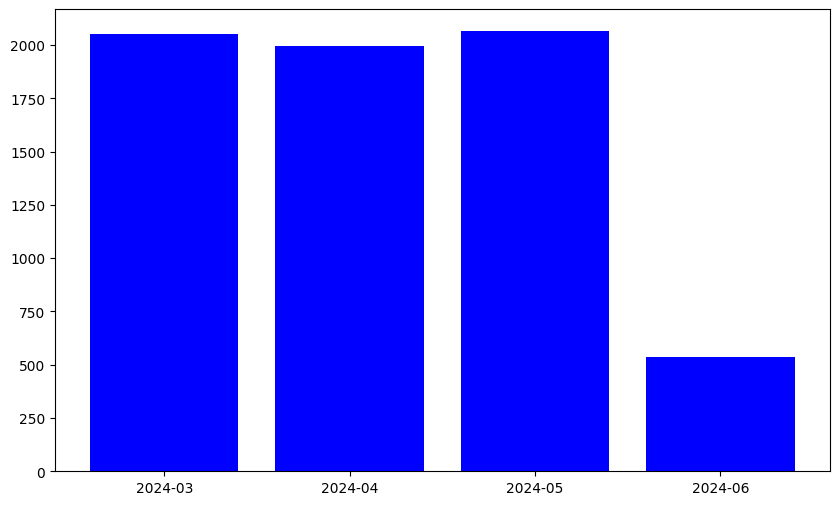

In [58]:
# Criando um grafico de barras para demonstrar a venda mensal.
plt.figure(figsize=(10, 6))
plt.bar(date, sales, color='blue', )
plt.show()

In [ ]:
# Demonstrando a representatividade de cada produto na venda

In [59]:
vendas_produtos = df_sales.groupby('product_name')['total'].sum().reset_index()

In [61]:
vendas_produtos

,product_name,total
0,Produto A,1525.0
1,Produto B,1800.0
2,Produto C,1200.0
3,Produto D,2120.0


In [71]:
fatias = [7, 2, 2, 13]
vendas = vendas_produtos['product_name']
cores = ['olive', 'lime', 'violet', 'royalblue']

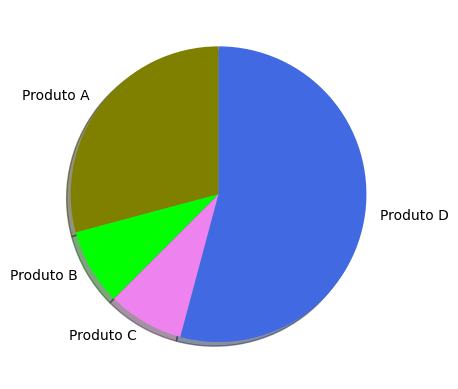

In [74]:
# neste gráfico podemos ver que o produto D é o mais vendido no período em análise
plt.pie(fatias, labels = vendas, colors = cores, startangle = 90, shadow = True)
plt.show()

In [89]:
df_teste_rox.to_csv('teste_rox.csv', sep=';', index=False)

In [91]:
df_teste_rox.dtypes

order_id                 int64
product_name            object
quantity                 int64
unit_price             float64
cliente_id              object
order_date      datetime64[ns]
total                  float64
year_month              object
id_cliente              object
name                    object
last_name               object
email                   object
phone_number            object
address                 object
number                  object
dtype: object

### <font color='blue'>Questão 4.</font>